# Capstone Modeling Part 2

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [124]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')

y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

X_train.drop('Unnamed: 0',axis=1,inplace = True)
X_test.drop('Unnamed: 0',axis=1,inplace = True)
y_train.drop('Unnamed: 0',axis=1,inplace = True)
y_test.drop('Unnamed: 0',axis=1,inplace = True)


In [125]:
def model_eval(model, X_train, y_train, X_test, y_test):

    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    model_metrics.append({'model':model,
                         'MAE':mae,
                         'MSE':mse,
                         'RMSE':rmse,
                         'R2':r2})

## Linear Models

In [126]:
model_metrics =[]

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

model_list_linear = [LinearRegression(),
                     ElasticNet(random_state = 343),
                     ElasticNet(l1_ratio= 1.0, alpha= 1.0,tol = .05,random_state = 343),
                     Lasso(random_state = 343, tol = .05),
                     Lasso(random_state = 343, tol = .05, alpha= 10.0),
                     Ridge(random_state = 343, tol = .05),
                     Ridge(random_state = 343, tol = .05, alpha= 2.0)
                                          
                    ]



for model in model_list_linear:
    model_eval(model, X_train, y_train, X_test, y_test)

In [127]:
model_metrics

[{'model': LinearRegression(),
  'MAE': 71527.51095290252,
  'MSE': 17012550092.897371,
  'RMSE': 130432.16663422168,
  'R2': 0.7168769853516532},
 {'model': ElasticNet(random_state=343),
  'MAE': 101605.61521410434,
  'MSE': 34222246760.813103,
  'RMSE': 184992.5586633503,
  'R2': 0.43047305559404847},
 {'model': ElasticNet(l1_ratio=1.0, random_state=343, tol=0.05),
  'MAE': 71456.87332468876,
  'MSE': 17001968119.44975,
  'RMSE': 130391.59527918106,
  'R2': 0.7170530906508035},
 {'model': Lasso(random_state=343, tol=0.05),
  'MAE': 71456.87332468876,
  'MSE': 17001968119.44975,
  'RMSE': 130391.59527918106,
  'R2': 0.7170530906508035},
 {'model': Lasso(alpha=10.0, random_state=343, tol=0.05),
  'MAE': 71312.3691563509,
  'MSE': 16991498443.162144,
  'RMSE': 130351.44204481262,
  'R2': 0.717227327099587},
 {'model': Ridge(random_state=343, tol=0.05),
  'MAE': 71456.38157694937,
  'MSE': 17001575747.596344,
  'RMSE': 130390.09068022134,
  'R2': 0.7170596205067858},
 {'model': Ridge(alp

## Non-linear Models

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [129]:
X_trainA = np.array(X_train)
X_testA =np.array(X_test)
y_trainA = np.array(y_train)
y_testA =np.array(y_test)

y_trainA = y_trainA.ravel()
y_testA = y_testA.ravel()

features = X_train.columns

In [130]:
model_list_nonlinear = [RandomForestRegressor(random_state =343,n_jobs =-1),
                        GradientBoostingRegressor(random_state =343),
                        KNeighborsRegressor()]

for model in model_list_nonlinear:
    model_eval(model, X_trainA, y_trainA, X_testA, y_testA)

In [134]:
model_metrics[-3:]

[{'model': RandomForestRegressor(n_jobs=-1, random_state=343),
  'MAE': 63952.21535523913,
  'MSE': 15026955463.131401,
  'RMSE': 122584.48296228769,
  'R2': 0.7499212693878019},
 {'model': GradientBoostingRegressor(random_state=343),
  'MAE': 70963.11265794211,
  'MSE': 16706409287.1245,
  'RMSE': 129253.27573073149,
  'R2': 0.7219717834485873},
 {'model': KNeighborsRegressor(),
  'MAE': 75326.11737130338,
  'MSE': 21235487601.538586,
  'RMSE': 145724.01175351502,
  'R2': 0.6465988206091882}]

   ## Final Model Choice

Looking at the model predictions, the default Random Forest Regressor performed the best out of the other models.  Random Forest has an R squared of 74.99%, a Mean Absolute Error of 63,952, and a Root Mean Squared Error of 122,584.  The model will now be hyper-parameter tuned to improve performance.

In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
param_grid ={'n_estimators':[50,100, 150],
            'max_depth' : [None, 20, 25, 30], 
            'min_samples_split' : [2, 5, 10, 15, 20],
            'min_samples_leaf' : [1, 3, 4]}

RF = RandomForestRegressor(random_state = 343, n_jobs = -1)

RF_RCV = RandomizedSearchCV(RF, 
                            param_grid,
                            scoring = 'neg_root_mean_squared_error',
                            random_state= 343,
                            n_jobs = -1)


RF_RCV.fit(X_trainA, y_trainA)

print(RF_RCV.best_score_)
print(RF_RCV.best_params_)

-123487.89625118778
{'n_estimators': 150, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 30}


In [135]:
def model_eval2(model, X_train, y_train, X_test, y_test):

    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    model_metrics.append({'model':model,
                         'MAE':mae,
                         'MSE':mse,
                         'RMSE':rmse,
                         'R2':r2})
    return(model)

In [136]:
fit_model = model_eval2(RandomForestRegressor(random_state = 343, 
                                              n_jobs = -1,
                                              n_estimators = 150,
                                              min_samples_split= 20,
                                              min_samples_leaf = 1,
                                              max_depth = 30),
                        X_trainA,
                        y_trainA,
                        X_testA,
                        y_testA)

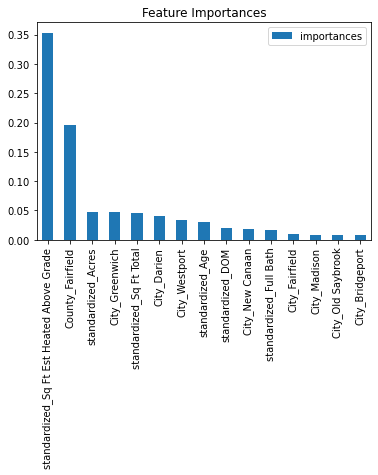

In [137]:
feat_imp= pd.DataFrame({'importances':fit_model.feature_importances_},index = features)

feat_imp.sort_values(by = 'importances',ascending = False).head(15).plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [139]:
model_metrics[-1]

{'model': RandomForestRegressor(max_depth=30, min_samples_split=20, n_estimators=150,
                       n_jobs=-1, random_state=343),
 'MAE': 63744.66284738157,
 'MSE': 14902922329.742113,
 'RMSE': 122077.52589949599,
 'R2': 0.7519854299310303}

With hyperparameter tuning, the model predictions were slightly improved.  With tuned parameters the mean absolute error was 63744, the root mean squared error was 122077, and R-squared of 
%75.20.

In [143]:
(pd.DataFrame(model_metrics)).to_csv('model_metrics.csv')